# Introduction to Linear Machine Learning

![](figs/big_hammer.jpeg)


In [1]:
from IPython.display import IFrame
import numpy as np

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import neighbors, datasets, svm
from sklearn.datasets import load_breast_cancer, load_iris, make_blobs, make_circles
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

import seaborn as sns

import pandas as pd

import pickle

## What is Machine Learning?


Everyone write down their definition


- “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia


- “Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.


- “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University


- Machine learning research is part of research on artificial intelligence, seeking to provide knowledge to computers through data, observations and interacting with the world. That acquired knowledge allows computers to correctly generalize to new settings.


- “Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.”


## Mathematical Definition


The problem is to take _n-samples_ of data with _m-features_ and try to predict a property of unknown data


- Generally, each sample has multiple attributes commonly called **features**


- When using linear machine learning models choice of features is essential


## Machine Learning Basic Concepts


### Representations

- A set of classifiers or the language that a computer understands
- How the model connects data to the objective


**The way humans make inferences from data is different than machines**


Examples:

- K-nearest neighbors
- support vector machines
- decision trees
- neural networks
- ...


### Evaluation

- how the model determines its success at completing an objective


**The ways humans and computers quantify success at **an objective **are** very different\*\*\*\*


Examples:

- accuracy/error rate
- squared error
- likelihood
- KL divergence (entropy between two distributions)
- ...

**Note for Engineers - The concepts of statistical thermodynamics are very relivant to machine learning dynamics**


## Optimization

- the model search method
- how the model improves itself
- how the model values exploration vs. exploitation


**The way that humans and computers optimize and solve problems is very different**


Examples:
Combinatorial optimization

- random search
- greedy search
  Continuous optimization
- gradient descent
- quasi-Newton method


![figure](figs/Componets_of_a_learning_algorithm.png)


In [2]:
IFrame(src='http://www.r2d3.us/visual-intro-to-machine-learning-part-1/', width=1000, height=800)

## How do we get machines to learn?


- Choose the best learning algorithm


Other things that matter

- Collect and collate meaningful data


- Provide the data to the machine in a form that emphasizes the learning objective


Humans and machines are great collaborators:

- Humans are great at deducing conclusions from a few examples based on abstract connections between observations


- Machines are great at searching large high-dimensional information for statistical trends


## Challenges and Limitations


### Overfitting


![figure](figs/Explaining_Overfitting.png)


This might be a comfy bed for you, but I don't know if your friend would like to sleep on it ☺️


- It is possible to get perfect accuracy on a test set but cannot conduct inference on a new problem
- The model is not **generalizable**


A model can classify types of apples but show it an orange and it is useless


### Overfitting Example with Polynomials


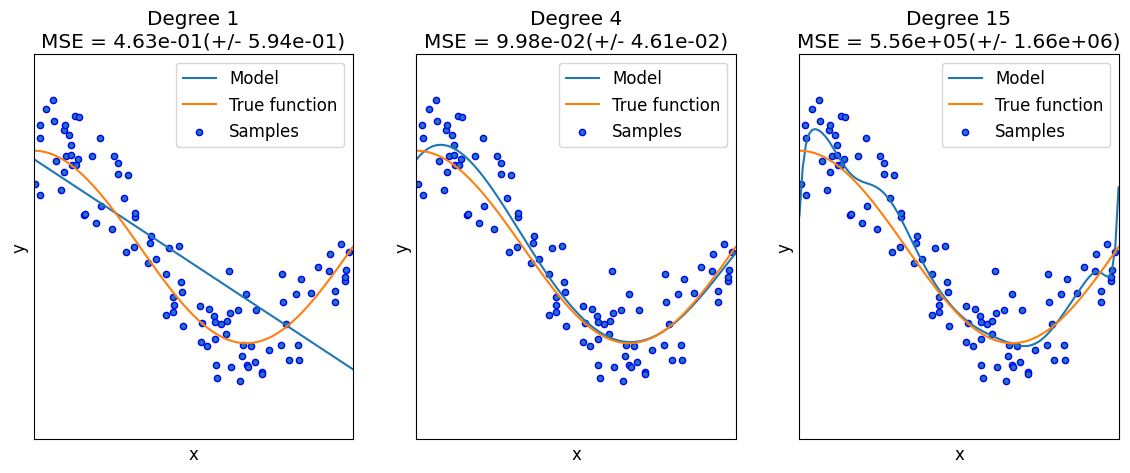

In [3]:
# Defines the function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# sets a random seed for consistent plotting
np.random.seed(0)

# sets the number of samples
n_samples = 100

# Sets the range in degrees
degrees = [1, 4, 15]

# adds some noise to the data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

# does the plotting
plt.figure(figsize=(14, 5))

# Loops around the number of degrees selected
for i in range(len(degrees)):

    # makes the subplot
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # creates the polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    # Least squares linear regression
    linear_regression = LinearRegression()

    # establishes a fitting pipeline
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # does the fit
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Defines a linear vector
    X_test = np.linspace(0, 1, 100)

    # plots the real model
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")

    # plots the generated data
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    # sets the axes format
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

## Categories of Machine Learning


### Supervised Learning


- The data that we have comes with examples that have ground truths for what we want to predict


In [4]:
IFrame(src='https://scikit-learn.org/stable/supervised_learning.html#supervised-learning', width=1000, height=1000)

### Classification

- Samples belong to two or more classes ... we want to learn from labeled data how to predict the class of an unlabeled example.
  - Example: Read handwritten digits from images


### Regression

- The desired output consists of one or more continuous variables.
  - Example: Predict the yield of product for a given operating condition


## Unsupervised Learning

- Training data consists of input values without any target values
  Goals are to:


- **Cluster** - Cluster data into groups


- **Dimensionality Reduction** - Reduce the dimensionality of data


- **Generation** - Try to generate new samples that belong to the same distribution


In [5]:
IFrame(src='https://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning', width=1000, height=1000)

## Designing a Training and Validation

### Training and Testing Sets


- When conducting machine learning we want to train the model with one **training dataset** and then apply it to new never-before-seen **testing data**
- It is quite common to have a **validation dataset** that you can validate your model independent of your in-training metrics


## Example Workflow


### Loading Example Datasets

- `scikit-learn` has a handful of datasets for testing purposes
- It is always good to benchmark models on standard data sets


In [6]:
# imports iris dataset
iris = datasets.load_iris()

# imports digits dataset
digits = datasets.load_digits()

- Each of these datasets are classes that contain:
  - `*.data` : `n_samples, n_features` samples and features
  - `*.target` : ground truth


### Visualization

You must have an idea of what the data from a random sample of your dataset looks like


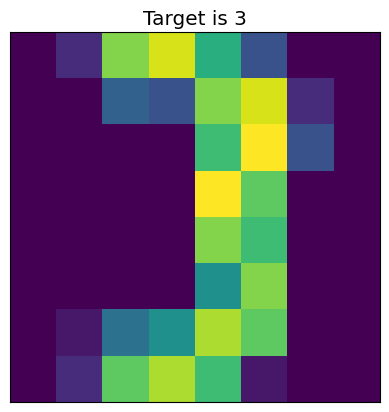

In [7]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

### Learning to Fit and Predict

- For now, we can think of the algorithm as a semi-perfect magical black box


In [8]:
# makes an object that is the classifier with specific hyperparameter
# this is the model that you are training
clf = svm.SVC(gamma=0.001, C=100)

- Here we choose some good parameters that might have to use gridsearch or cross-validation to determine these


### Fitting the data


In [9]:
# Fit the model using some data
# Includes all data except the last index
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

### Visualizing the Results


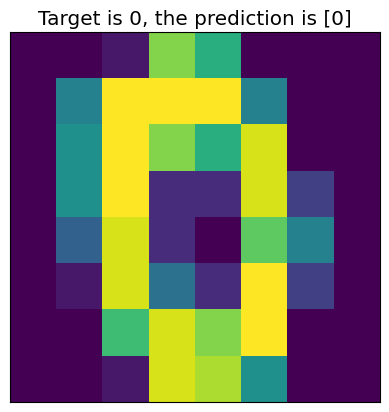

In [10]:
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}, the prediction is {clf.predict(digits.data[ind].reshape(1,-1))}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

### Saving a model


- Once trained it is possible to save a model to a file using `pickle`


#### Saves the Model

Saves the model object as a pickle


In [11]:
# saves the model 
s = pickle.dumps(clf)


#### Loads the Saved Model


In [12]:

# loads the model
clf2 = pickle.loads(s)


#### Tests the Loaded Model


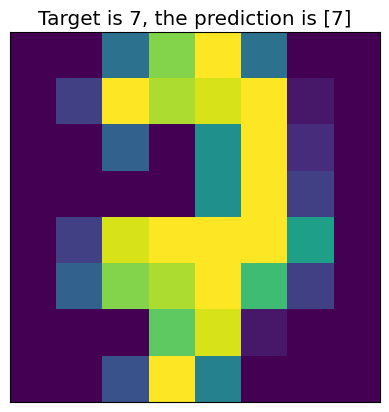

In [13]:

# test the model
# selects a random example
ind = np.random.randint(0,100)

plt.imshow(digits.data[ind].reshape(8,8))
plt.title(f'Target is {digits.target[ind]}, the prediction is {clf2.predict(digits.data[ind].reshape(1,-1))}')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

## Types of Objects in Scikit-Learn


1. **Datasets:** List of multidimensional observations


2. **Estimator Objects:** Any object that learns from data.
   In estimators you can: - Set parameters `estimator = Estimator(param1=1, param2=2)` - Fit some data `estimator.fit(data)` - Predict the output from some data `estimator.predict(data)`


## Supervised Learning - Details


### Example: Classifying Irises

The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width:

We will use this very simple dataset to explain ML concepts


In [14]:
# loads iris dataset
iris = datasets.load_iris()

# Sets the data to iris_x
iris_X = iris.data

# Sets the target to iris_y
iris_y = iris.target

# shows the unique targets
np.unique(iris_y)

array([0, 1, 2])

### K-Nearest Neighbor Classifier

- One of the most simple classifiers


- Finds a predefined number of training samples (defined by the user) to a new point for classification


![](images/KNN-Classification.gif)


- Can use any distance metric but most commonly Euclidean distance


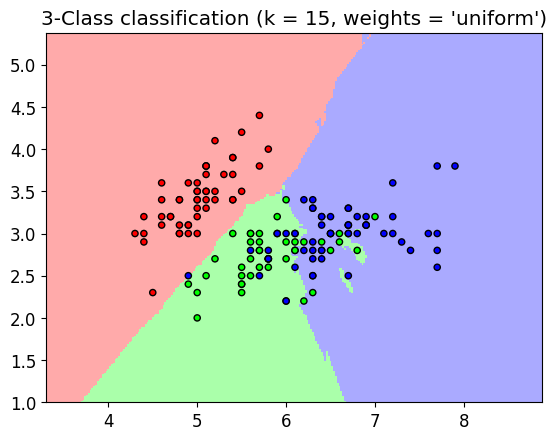

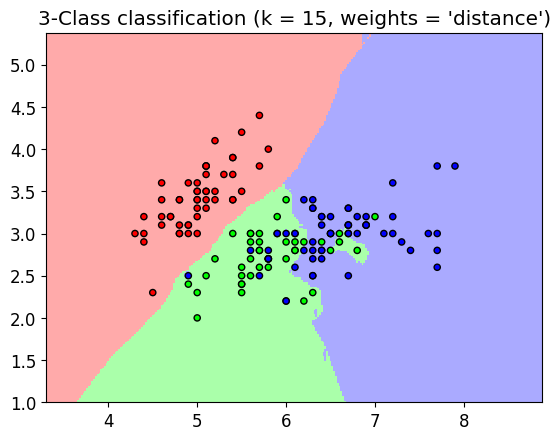

In [15]:
# sets the number of nearest neighbors
n_neighbors = 15

# import the iris data
iris = datasets.load_iris()

# we only take the first two features.
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbors Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.
- 'distance' : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors who are further away.


### Curse of Dimensionality

- As the dimensionality of a dataset grows it becomes sparse


- For an estimator to be reasonable you need the distance between points to be less than some value _d_ which depends on the problem


- The amount of data needed (to be statistically significant) grows exponentially as the dimensionality increases


#### Excluding one dimension in the classification


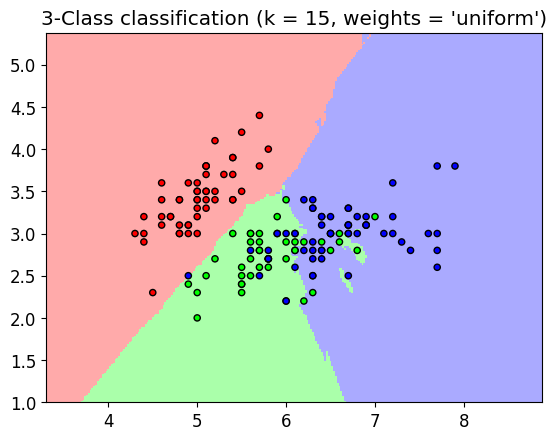

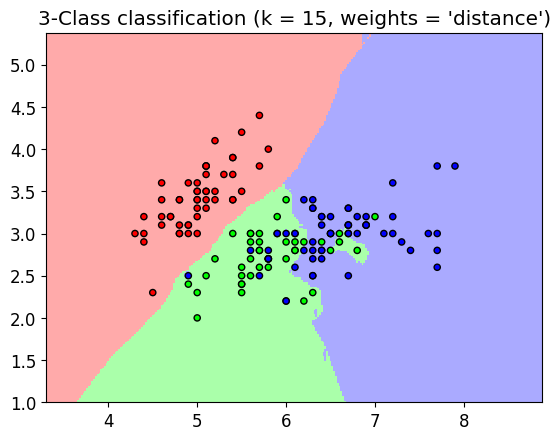

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features.
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbors Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

- In 1D this requires $n \propto 1/d$ however when you have _p_ features this becomes $n \propto 1/d^{p}$


**It is common to use ML to reduce the dimensionality of the problem**

- This could be using dimensionality reduction techniques
- Could be using featurization methods


#### Using Machine Learning to Reduce the Curse of Dimensionality


#### Linear Regression

$y = x\beta + \epsilon$


##### Example Dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measured on 442 patients, and an indication of disease progression after one year:

Want to predict disease progression


In [17]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
print(regr.score(diabetes_X_test, diabetes_y_test) )

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
0.585085427447195


**Clearly, a linear model does not work that well in this high-dimensional problem**


### Shrinkage


**Problem:** if there are only a few data points per dimension, noise in the observation induces a large variance


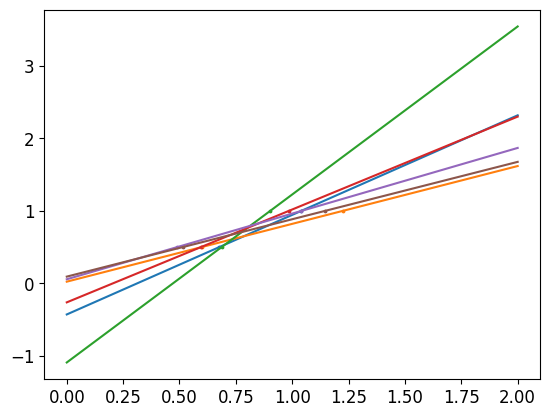

In [19]:
# makes example data
X = np.c_[ .5, 1].T
y = [.5, 1]

# makes test data
test = np.c_[ 0, 2].T

# makes an object for a linear fit
regr = linear_model.LinearRegression()

# makes the figure
plt.figure() 

# fixes the seed
np.random.seed(0)

# adds variance and does the fitting for samples with variance
for _ in range(6): 
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

The way to deal with variance is to reduce the model complexity by adding statistical damaging mechanisms called **regularization**


#### A Step back with simple mathematics

We are fitting some data to a linear model <br>
$\hat{y} = w[0] \times X[0] + w[1] \times X[1] + ... + w[n] \times X[n] + b$


When we fit the cost function is the mean squared error:

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2$ <br>
M - number of instances or samples <br>
p - number of features


- If you do a test/train split you get an idea if the model is overfitting


- We want to add constraints on the model which reduces the complexity (regularization)


#### Ridge Regression


- The cost function is altered by adding a penalty equivalent to the square of the magnitude of the coefficients
- This drives the coefficients to be small


##### The Cost Function for Ridge Regression

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2 + \lambda\sum_{j=0}^{p}w_{j}^{2}$ <br>


- shrinks the coefficients and multicollinearity


- $\lambda$ sets the magnitude of this effect
- As $\lambda \rightarrow 0$ becomes a linear fit


##### Examples


###### Loads data


In [20]:
california=datasets.fetch_california_housing()
california_df=pd.DataFrame(california.data,columns=california.feature_names)
print(california_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


###### Adds the target into the pandas dataframe


In [21]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
california_df['Price']=california.target
print(california_df.head(3))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  


###### Saves a new df without the price


In [22]:
newX=california_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=california_df['Price']

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  


###### Test Train Split


In [23]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(f'Test size: {len(X_test)} , {len(y_test)}')
print(f'Train size: {len(X_train)} , {len(y_train)}')

Test size: 6192 , 6192
Train size: 14448 , 14448


###### Builds the Linear Regression Object


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

###### Builds the Ridge Regression Object


In [25]:
rr = Ridge(alpha=.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=1000) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=1000)

###### Evaluation of the Ridge Regression Model


In [26]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.6096935309447493
linear regression test score: 0.5910064719662455
ridge regression train score low alpha: 0.6096935309343097
ridge regression test score low alpha: 0.5910073521875898
ridge regression train score high alpha: 0.5986287799213987
ridge regression test score high alpha: 0.5997728167392642


###### Visualizing the results


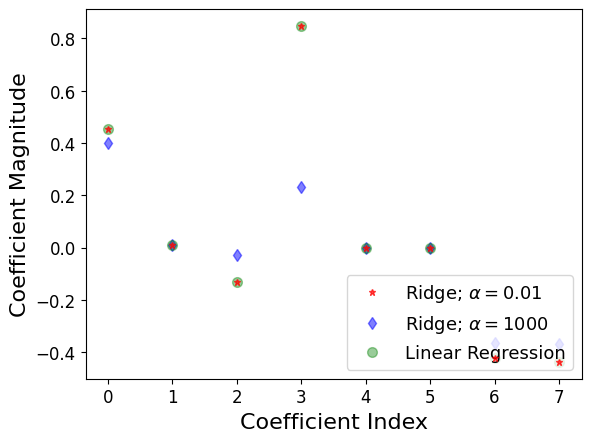

In [27]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1000$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### What does this mean?


- X-axis we have the coefficients for the 8 features


- When $\alpha$ is low looks like a linear fit


- When $\alpha$ is high all of the coefficients shrink


The model is less responsive to small variances in a particular parameter

- Better at generalizing


- The difference between the training and validation accuracy with a high $\alpha$ is less, this means there is less overfitting.


**Note** Ridge regression is regularly called **L2**


#### Lasso Regression


##### Cost Function for Lasso Regression

$\sum_{i=1}^{M}(y_i-\hat{y_i})^2 = \sum_{i=1}^{M}(y_i - \sum_{j=0}^{p}w_j\times x_{ij})^2 + \lambda\sum_{j=0}^{p}|w_{j}|$


Just like Ridge regression:

- $\lambda$ sets the magnitude of this effect
- As $\lambda \rightarrow 0$ becomes a linear fit


Lasso or L1 regularization drives the weights to 0:


- Can be used to impose sparsity (independence) in model $\rightarrow$ used in feature selection


- Lasso regression helps reduced overfitting


##### Example


###### Loads the data and makes test train split


In [28]:
cancer = load_breast_cancer()
print(cancer.keys())

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head(3))

X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57  

###### Defines the model and prints results


In [29]:
# alpha = 1

# instantiates the lasso model
lasso = Lasso()
# fits the training data
lasso.fit(X_train,y_train)
# computes the training score
train_score=lasso.score(X_train,y_train)
# computes the test score
test_score=lasso.score(X_test,y_test)
# counts the number of features used by the model
coeff_used = np.sum(lasso.coef_!=0)

# prints the results
print("training score:", train_score) 
print("test score: ", test_score)
print ("number of features used: ", coeff_used)

# alpha = 0.01

# instantiates the lasso model
lasso001 = Lasso(alpha=0.01, max_iter=int(10e5))
# fits the training data
lasso001.fit(X_train,y_train)
# computes the score
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
# counts the number of features used by the model
coeff_used001 = np.sum(lasso001.coef_!=0)

# prints the results
print( "training score for alpha=0.01:", train_score001 )
print( "test score for alpha =0.01: ", test_score001)
print( "number of features used: for alpha =0.01:", coeff_used001)

# alpha = 0.0001

lasso00001 = Lasso(alpha=0.0001, max_iter=int(10e5))
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print( "training score for alpha=0.0001:", train_score00001 )
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

# linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print( "LR training score:", lr_train_score )
print( "LR test score: ", lr_test_score)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha =0.01: 10


training score for alpha=0.0001: 0.7754092006936698
test score for alpha =0.0001:  0.7318608210757908
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055069
LR test score:  0.7329325010888668


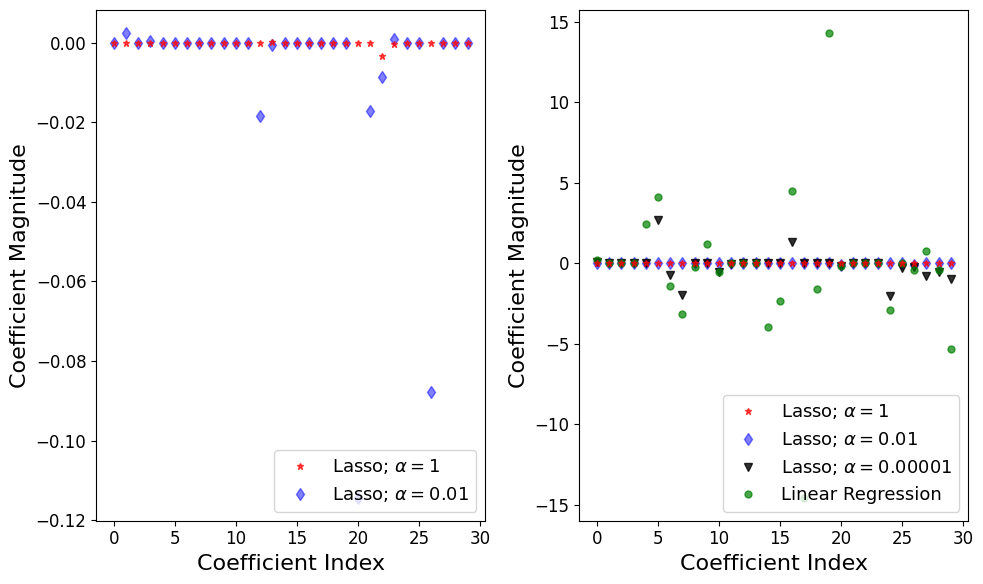

In [30]:
f = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


###### Explaining the Results


- For the default case $\alpha = 1$, 4 out of 30 features have non-zero coefficients


**Questions: is this model overfitting or underfitting?**


- Both training and test results are low $\rightarrow$ model is underfitting


- $\alpha = 0.01$, 10 out of 30 features have non-zero coefficients, and test and training scores increase


- as $\alpha$ decreases further resemble linear regression


#### Visual Explanation of Lasso and Ridge Regression


![](figs/Lasso_ridge.png)


### Logistic Regression


Not all problems are continuous


- There are instances where we want to determine a binary state


- Logistic regression is good for qualitative results


- Logistic regression is concerned with the probability that a response falls into a particular category


#### Evaluating Classification

- True Positives
- True Negatives
- False Positives
- False Negatives


Logistic regression uses a Sigmoid function for situations where outputs can have one of two values either 0 or 1


$$\omega(z)=\frac{1}{1+e^{-z}}$$


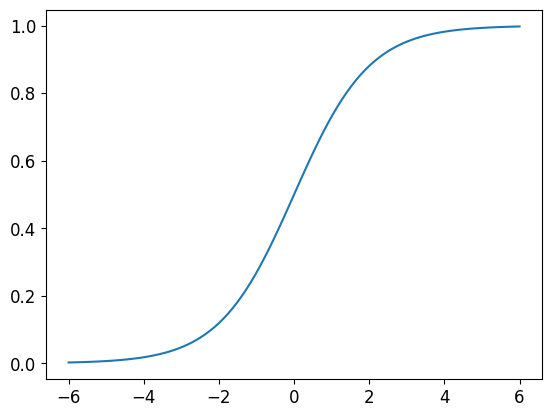

In [31]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

x = np.linspace(-6,6,100)
plt.plot(x,sigmoid(x))

#### Take our linear regression solution and put it into a logistic model

$$\omega(z)=\frac{1}{1+e^{-(x\beta + \epsilon)}}$$


#### Example

The Challenge:

The sinking of the Titanic is one of the most infamous shipwrecks in history.


On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.


While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [32]:
# Use pandas to read in csv file
train = pd.read_csv('./data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Locates and Visualizes the Missing Values

- You cannot train a machine learning model with missing values. It will not know what to do.


In [34]:
# Use the .isnull() method to locate missing data
missing_values = train.isnull()
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

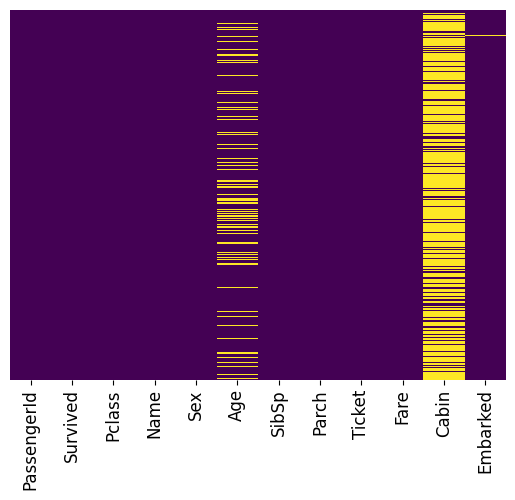

In [35]:
# Use seaborn to conduct heatmap to identify missing data
# data -> argument refers to the data to create heatmap
# yticklabels -> argument avoids plotting the column names
# cbar -> argument identifies if a colorbar is required or not
# cmap -> argument identifies the color of the heatmap
sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis')

##### Viewing the ratios of the labels


<Axes: xlabel='Survived', ylabel='count'>

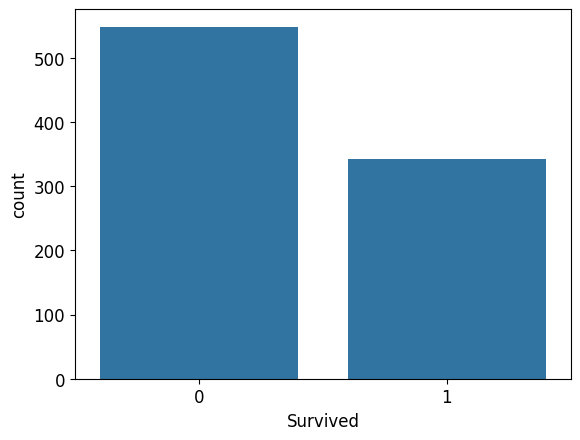

In [36]:
# Use the countplot() method to identify ratio of who survived vs. not
# (Tip) very helpful to get a visualization of the target label
# x -> argument refers to column of interest
# data -> argument refers to dataset
sns.countplot(x='Survived', data=train)

##### Survival Based on Catagory


<Axes: xlabel='Survived', ylabel='count'>

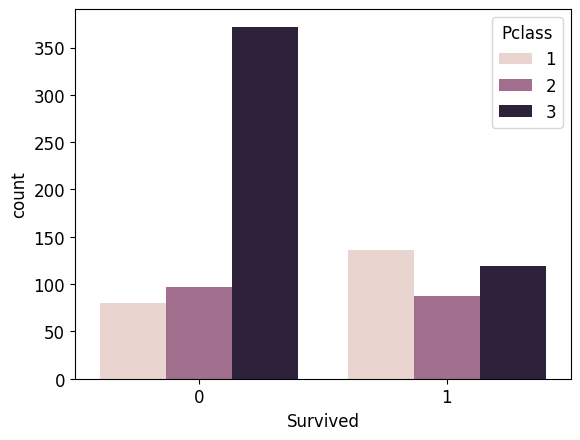

In [37]:
# Use the countplot() method to identify ratio of who survived vs. not with interest in Passenger class
# x -> argument refers to column of interest
# data -> argument refers to dataset
# hue -> allows another level to subdivide data
# palette -> argument refers to plot color
sns.countplot(x='Survived', data=train, hue='Pclass')

##### What to do with all this missing data?


We can impute or infill these values based on the data distribution

- When doing this it is important to look at the data distribution to make sure this makes sense


<Axes: xlabel='Pclass', ylabel='Age'>

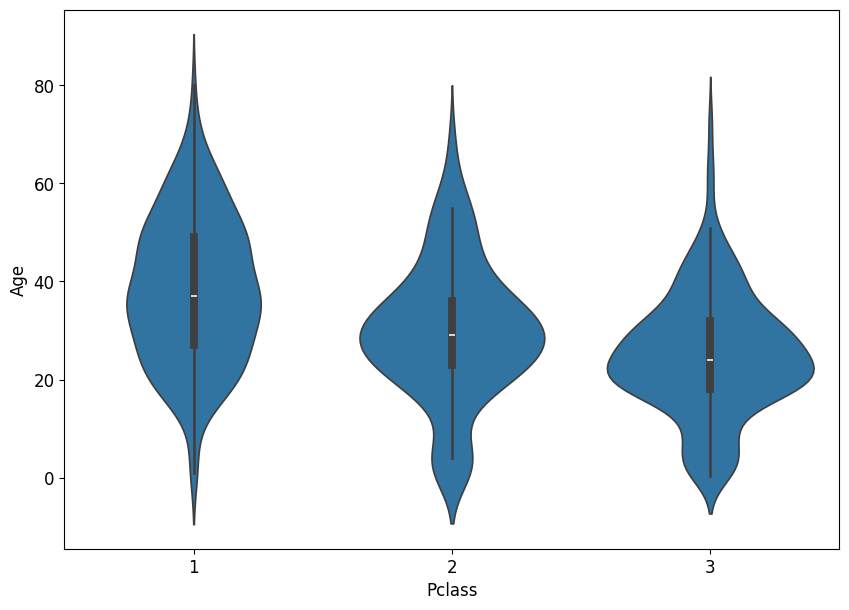

In [38]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Pclass', y='Age', data = train)

##### Create a function to Impute Missing Values


In [39]:
# Create function to impute the age value if it is null
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
# Apply function to impute the age for missing values
# The age column is at position 0
# The pclass column is at position 1
# axis -> argument refers to columns instead of rows to apply the impute_age function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\jca92\AppData\Local\Temp\ipykernel_42740\3424501339.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\jca92\AppData\Local\Temp\ipykernel_42740\3424501339.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [40]:
# Create function to replace the few empty Embark Values
def impute_embark(cols, value):
    embark = cols[0]
    
    if pd.isnull(embark):
        return value
    else: 
        return embark

    
train['Embarked'] = train[['Embarked']].apply(impute_embark, axis=1, args = (train['Embarked'].mode()[0]))

C:\Users\jca92\AppData\Local\Temp\ipykernel_42740\4061613438.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  embark = cols[0]


**It is always important when you modify data you check that it worked**


<Axes: >

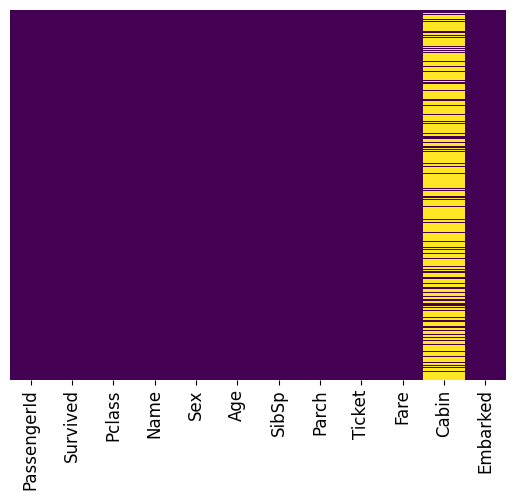

In [41]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**There are barely any cabin entries we should ignore them**


In [42]:
# use .dropna() method to remove rows that contain missing values
train.dropna(inplace=True)

##### Categorical Variables

**What should we do with categorical variables?**


We need to convert categorical variables (not understood by computers) into dummy variables which can be understood.


- Produces what is known as a one-hot encoded vector


![](./figs/one_hot_encoded.png)


In [43]:
# Use the .get_dummies() method to convert categorical data into dummy values
# train['Sex'] refers to the column we want to convert
# drop_first -> argument avoids the multicollinearity problem, which can undermines
# the statistical significance of an independent variable.
sex = pd.get_dummies(train['Sex'], drop_first=True) # drop first means k-1 values
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# Use  .concat() method to merge the series data into one dataframe
train = pd.concat([train, sex, embark], axis=1)

##### Drop any insignificant features from the dataset


In [44]:
# Drop columns with categorical data
train.drop(['Sex','Embarked','Ticket','Name','PassengerId'], axis=1, inplace=True)

#### Training the model


##### Step 1: Split the data into features and labels


In [45]:
# Split data into 'X' features and 'y' target label sets
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

##### Step 2: Split the data into test and training sets


In [46]:
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

##### Step 3: Create and Train the Model


In [47]:
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import classification_report

predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        26
           1       0.70      0.78      0.74        36

    accuracy                           0.68        62
   macro avg       0.67      0.66      0.66        62
weighted avg       0.67      0.68      0.67        62



##### F1-Score

It is calculated from the precision and recall of the test

- **Precision** is the number of true positive results divided by the number of all positive results, including those not identified correctly
  - known as positive predictive value

$$ Precision = \frac{True\,Positives}{True\,Positives + False\,Positives} $$

    - within everything that is predicted positive this is the percentage correct


- **Recall** is the number of true positive results divided by the number of all samples that should have been identified as positive.
  - known as sensitivity in diagnostic binary classification

$$ Recall = \frac{True\,Positives}{True\,Positives + False\,Negatives} $$

    - what is the fraction of actual positive results the model found


$$
F_1 = \frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}} = 2 \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} = \frac{2\mathrm{tp}}{2\mathrm{tp} + \mathrm{fp} + \mathrm{fn}}
$$


##### Step 4: Visualizing Results


In [49]:
# computes the confusion matrix
cm = confusion_matrix(y_test, predictions)

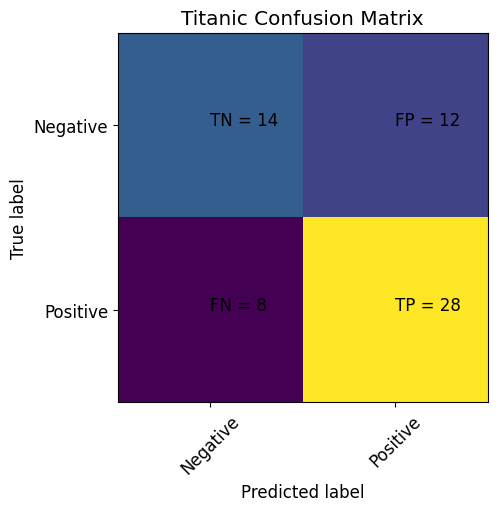

In [50]:
# Plots the confusion matrix

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Titanic Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Multiclass classification

If you have several classes to predict, an option often used is to fit one-versus-all classifiers and then use a voting heuristic for the final decision.


In [51]:
from sklearn.datasets import load_iris

# loads the dataset
X, y = load_iris(return_X_y=True)

# Instantiates the model and computes the logistic regression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

# This predicts the classes
clf.predict(X[:2, :])

C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [52]:
# predicting the probability
clf.predict_proba(X[:2, :]) 

array([[9.81810819e-01, 1.81891663e-02, 1.44226885e-08],
       [9.71750652e-01, 2.82493178e-02, 3.01583887e-08]])

In [53]:
# Shows the score for the model
clf.score(X, y)

0.9733333333333334

### Support Vector Machines


- A type of discriminate machine learning model


- They try and build a plane in space that separates examples that belong to different classes with the widest possible margin


- New examples that are mapped onto that space get "classified" based on which side of the boundary they fall on


#### Example: Random Data


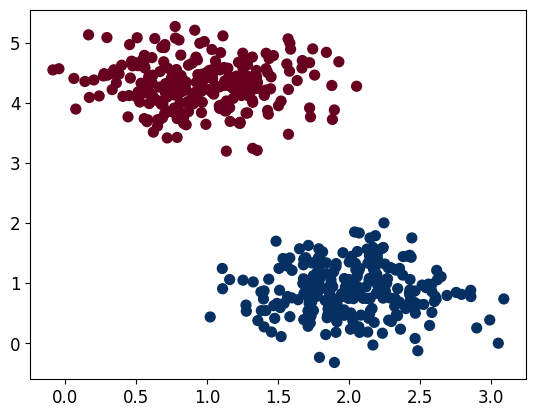

In [54]:
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu'); 
plt.show()  

In this case, it is very easy to classify the points with a linear boundary


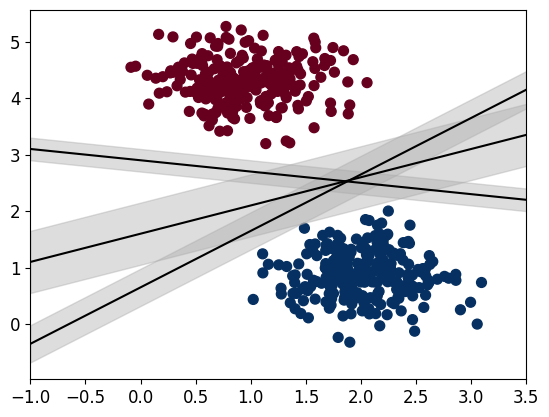

In [55]:
# creating line space between -1 to 3.5  
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='RdBu') 
  
# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-1, 3.5); 
plt.show() 

- SVMs try and find the widest possible perpendicular distance between the dividing vector and the points


#### Example: Breast Cancer Data


##### Step 1: Load the Data

We'll use the built-in breast cancer dataset from `Scikit-Learn`. We can get with the load function:


In [56]:
cancer = load_breast_cancer()

##### Step 2: Understanding the Data

The data set is presented in a dictionary form:


In [57]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The `DESCR` contains a description of the information in the dataset


In [58]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [59]:
# A list of the feature names
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### Step 3: Building the Data Structure for Training


In [60]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [61]:
# Views how the labels are structured
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [62]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

##### Step 4: Validate the Data Structure


In [63]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Generally, at this stage, one would visualize that data using domain knowledge


##### Step 5: Test-Train Split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

##### Step 6: Train the Model


In [65]:
model = SVC(gamma='auto')
model.fit(X_train,y_train)

SVC(gamma='auto')

In [66]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.110800,0.2827,0.09208
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.129300,0.081230,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.42900,0.358700,0.183400,0.3698,0.10940
514,15.050,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.12460,0.21010,0.286600,0.112000,0.2282,0.06954
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.023370,0.009615,0.1580,0.06235,...,10.93,25.59,69.10,364.2,0.11990,0.09546,0.093500,0.038460,0.2552,0.07920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.12340,0.10640,0.086530,0.064980,0.2407,0.06484
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.281000,0.156200,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.15020,0.57170,0.705300,0.242200,0.3828,0.10070
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.066380,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.15000,0.20450,0.282900,0.152000,0.2650,0.06387
337,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.14980,0.48270,0.463400,0.204800,0.3679,0.09870


##### Step 7: Visualize the Results


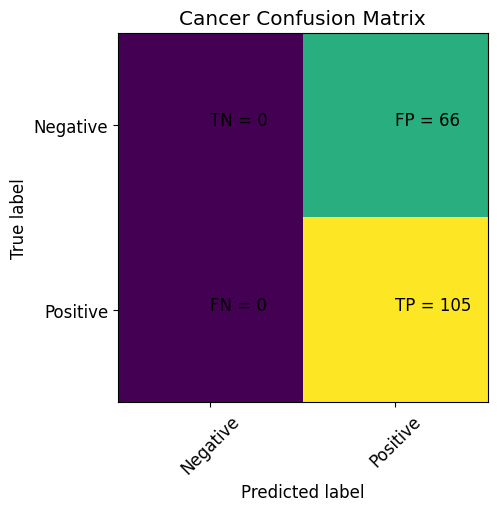

In [67]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Cancer Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**This is not good ... Our Machine Thinks Everyone has Cancer!!!!**


**What did we do wrong?**


##### Step 4a: Scaling the Data


When models fail:

1. Check how the data was normalized
2. Optimize the model parameters


In [69]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- The features have vastly different scales which makes them weighted unequally


###### Standard Scaler

Removes the mean and scales to a unit variance

$$ z = \frac{x - \mu}{\sigma}$$

- $\mu$ is the mean
- $\sigma$ is the standard deviation

**The result is all features will have a mean of 0 and a variance of 1**


In [70]:
# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.


scaler = StandardScaler()
df_feat = scaler.fit_transform(df_feat)
df_feat = pd.DataFrame(df_feat,columns=cancer['feature_names'])


In [71]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


##### Step 5: Test-Train Split


In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

##### Step 6: Train the Model


In [73]:
model = SVC(gamma='auto')
model.fit(X_train,y_train)

SVC(gamma='auto')

##### Step 7: Visualize the Results


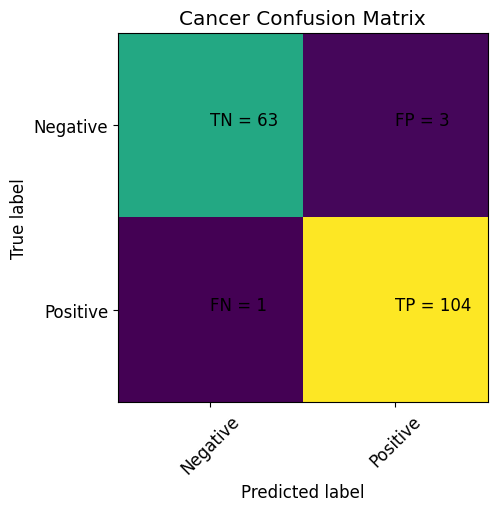

In [74]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Cancer Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

**That looks way better**


# Hyperparameter tuning by grid-search

There are many parameters which need to be tuned when building machine learning model. 
* It is non-inutitive what these parameters should be

## Example: Adults Census Data

This is a dataset that contains information from the 1994 Census. The goal is to predict if a person makes more than \$50,000 per year based on their demographic information.

In [75]:
from sklearn import set_config

set_config(display="diagram")

### Step 1: Load the Data

In [76]:
adult_census = pd.read_csv("./data/adult-census.csv")

### Step 2: Visualize and Clean the Data

We extract the column containing the target.

In [77]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

We drop from our data the target and the `"education-num"` column which
duplicates the information from the `"education"` column.

In [78]:
data = adult_census.drop(columns=[target_name, "education-num"])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


### Step 3: Test Train Split

Once the dataset is loaded, we split it into a training and testing sets.

In [79]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

### Step 4: Building a Pipeline

Within Scikit-learn there are tools to build a pipeline to automate preprocessing and data analysis. 

We will define a pipeline. It will handle both numerical and categorical features.

The first step is to select all the categorical columns.

In [80]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

Here we will use a tree-based model as a classifier
(i.e. `HistGradientBoostingClassifier`). That means:

* Numerical variables don't need scaling;
* Categorical variables can be dealt with an `OrdinalEncoder` even if the 
  coding order is not meaningful;
* For tree-based models, the `OrdinalEncoder` avoids having high-dimensional 
  representations.

We now build our `OrdinalEncoder` by passing it the known categories.

In [81]:



categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

We then use a `ColumnTransformer` to select the categorical columns and apply the `OrdinalEncoder` to them.

* The `ColumnTransformer` applies a the transformation to the columns of a Pandas dataframe.

In [82]:
preprocessor = ColumnTransformer([
    ('cat_preprocessor', categorical_preprocessor, categorical_columns)],
    remainder='passthrough', sparse_threshold=0)

Finally, we use a tree-based classifier (i.e. histogram gradient-boosting) to
predict whether or not a person earns more than 50 k$ a year.

In [83]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",
     HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Step 5: Tuning the Model Using GridSearch

* `GridSearchCV` is a scikit-learn class that implements a very similar logic with less repetitive code.

Let's see how to use the `GridSearchCV` estimator for doing such search. Since the grid-search will be costly, we will only explore the combination learning-rate and the maximum number of nodes.

In [84]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__learning_rate': (0.01, 0.1, 1, 10),
    'classifier__max_leaf_nodes': (3, 10, 30)}
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=2)
model_grid_search.fit(data_train, target_train)

CPU times: total: 156 ms
Wall time: 10.4 s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('cat_preprocessor',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                                       random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_leaf_nodes': (3, 10, 30)})

### Step 6: Validation of the Model

Finally, we will check the accuracy of our model using the test set.

In [85]:
accuracy = model_grid_search.score(data_test, target_test)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.88


<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p>Be aware that the evaluation should normally be performed through
cross-validation by providing <tt class="docutils literal">model_grid_search</tt> as a model to the
<tt class="docutils literal">cross_validate</tt> function.</p>
<p class="last">Here, we used a single train-test split to to evaluate <tt class="docutils literal">model_grid_search</tt>.
If interested you can look into more detail about nested cross-validation,
when you use cross-validation both for hyperparameter tuning and model
evaluation.</p>
</div>

The `GridSearchCV` estimator takes a `param_grid` parameter which defines
all hyperparameters and their associated values. The grid-search will be in
charge of creating all possible combinations and test them.

The number of combinations will be equal to the product of the
number of values to explore for each parameter (e.g. in our example 4 x 3
combinations). Thus, adding new parameters with their associated values to be
explored become rapidly computationally expensive.

Once the grid-search is fitted, it can be used as any other predictor by
calling `predict` and `predict_proba`. Internally, it will use the model with
the best parameters found during `fit`.

Get predictions for the 5 first samples using the estimator with the best
parameters.

In [86]:
model_grid_search.predict(data_test.iloc[0:5])

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

You can know about these parameters by looking at the `best_params_`
attribute.

In [87]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}


In addition, we can inspect all results which are stored in the attribute
`cv_results_` of the grid-search. We will filter some specific columns
from these results.

In [88]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
5,1.459787,0.161747,0.089122,0.005645,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.868912,0.867213,0.868063,0.000850,1
4,0.692873,0.002024,0.086328,0.009293,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.866783,0.866066,0.866425,0.000359,2
7,0.147120,0.004172,0.060034,0.005518,1,10,"{'classifier__learning_rate': 1, 'classifier__...",0.858648,0.862408,0.860528,0.001880,3
6,0.125093,0.001100,0.059673,0.004626,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.859358,0.859514,0.859436,0.000078,4
8,0.218438,0.011707,0.053841,0.002675,1,30,"{'classifier__learning_rate': 1, 'classifier__...",0.855536,0.856129,0.855832,0.000296,5


Let us focus on the most interesting columns and shorten the parameter
names to remove the `"param_classifier__"` prefix for readability:

In [89]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [90]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
5,0.1,30,0.868063,0.000850,1
4,0.1,10,0.866425,0.000359,2
7,1,10,0.860528,0.001880,3
6,1,3,0.859436,0.000078,4
8,1,30,0.855832,0.000296,5
3,0.1,3,0.853266,0.000515,6
2,0.01,30,0.843330,0.002917,7
1,0.01,10,0.817832,0.001124,8
0,0.01,3,0.797166,0.000715,9
11,10,30,0.288200,0.050539,10


#### Visualizing Hyperparameter Tuning

With only 2 parameters, we might want to visualize the grid-search as a
heatmap. We need to transform our `cv_results` into a dataframe where:

- the rows will correspond to the learning-rate values;
- the columns will correspond to the maximum number of leaf;
- the content of the dataframe will be the mean test scores.

In [91]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["learning_rate"],
    columns=["max_leaf_nodes"])

pivoted_cv_results

max_leaf_nodes,3,10,30
learning_rate,,,
0.01,0.797166,0.817832,0.843330
0.10,0.853266,0.866425,0.868063
1.00,0.859436,0.860528,0.855832
10.00,0.283476,0.262564,0.288200


We can use a heatmap representation to show the above dataframe visually.

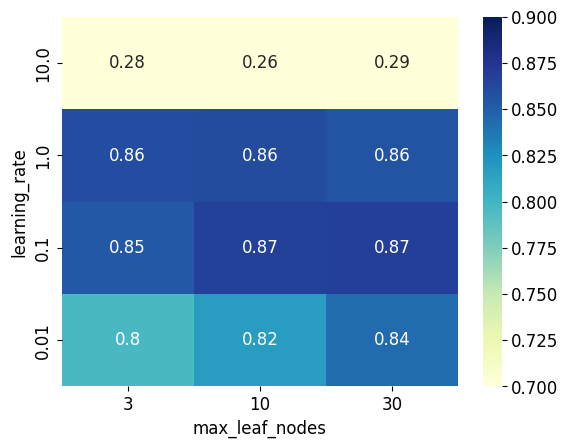

In [92]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7,
                 vmax=0.9)
ax.invert_yaxis()

The above tables highlights the following things:

* for too high values of `learning_rate`, the generalization performance of the
  model is degraded and adjusting the value of `max_leaf_nodes` cannot fix
  that problem;
* outside of this pathological region, we observe that the optimal choice
  of `max_leaf_nodes` depends on the value of `learning_rate`;
* in particular, we observe a "diagonal" of good models with an accuracy
  close to the maximal of 0.87: when the value of `max_leaf_nodes` is
  increased, one should decrease the value of `learning_rate` accordingly
  to preserve a good accuracy.

For now we will note that, in general, **there is no unique optimal parameter
setting**: 4 models out of the 12 parameter configurations reach the maximal
accuracy (up to small random fluctuations caused by the sampling of the
training set).

## Nonlinear Data

So far, we have made an assumption that all data is linear, this is usally not the case. 

* We should add non-linearity to help learn nonlinear trends. 


In [93]:
from IPython.display import HTML
HTML('<iframe width="868" height="651" src="https://www.youtube.com/embed/3liCbRZPrZA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Kernel Trick

* A Kernel trick converts data to a higher dimensional space where classes are linearly separable


Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space.


### Looking at Kernals

In [94]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

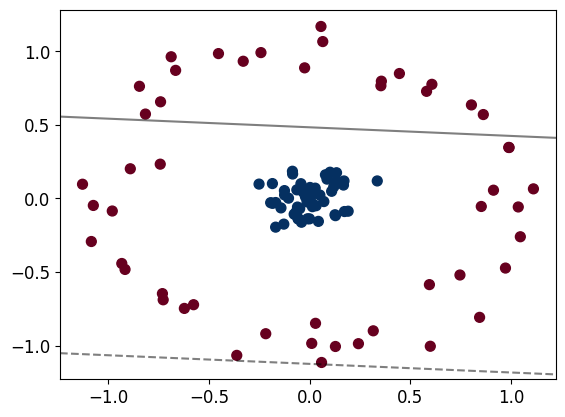

In [95]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plot_svc_decision_function(clf, plot_support=False);

* Clearly we cannot use a linear classifier to classify this data!


We could apply a radial basis function centered on the central clump to expand this data into a higher dimensional and make it amenable to a linear classifier


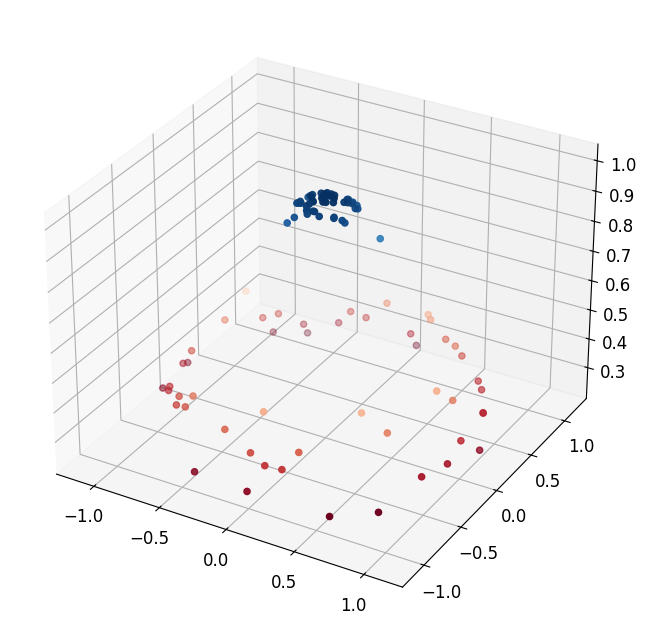

In [96]:
from ipywidgets import interact, fixed


from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], r, c=r, cmap='RdBu')

* Now, making a linear classifier is trivial


### Kernel Tricks


* It is not possible to randomly try to find the correct location for a kernel when you have a large number of dimensions

* You can use a kernel trick - we do not have time to go into the mathamatics of kernel tricks. If you are interested in learning more go [here](https://en.wikipedia.org/wiki/Kernel_method)

#### Example: Using Kernel Tricks


In [97]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

### Plotting the results


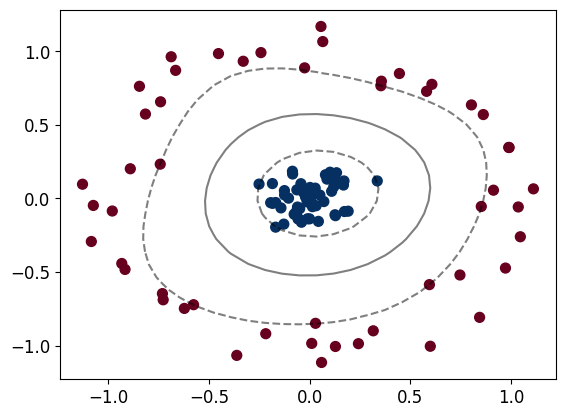

In [98]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

* There are a bunch of kernels which you can use

#### Example: Visualization of Different Kernels


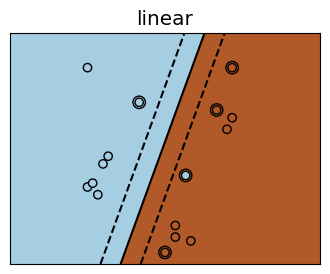

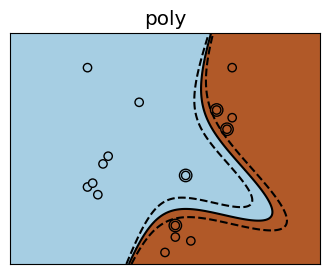

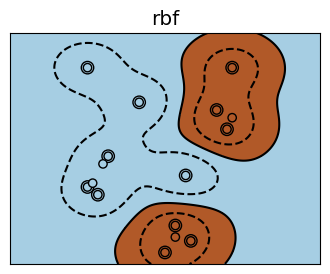

In [99]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    plt.title(kernel)
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

* It is rare, particularly with high-dimensional data that you will know what your kernel should be $\rightarrow$ you can use hyperparameter tuning to discover the best model.

## Decision Trees


A thought experiment: When you wake up and decide to attend class there are many things that factor into your decision.

1. The grade you want to get
2. Did you get a good night sleep
3. Do you have a lot of other work to do
4. Do you think the class is important
5. Are you feeling sick
   ...

<br> 
Each of these effect the outcome of if you show up to class or not ... You can try how much each of these features effect decision making


* Let's assume your decision is highly based on the weather

![](figs/Decision_Tree_1.png)


![](images/Decision_Tree_Terminology.png)

- Nodes: split for a value of a particular attribute
- Edges: results of a particular decision


- Root: node that performs the first split
- Leaves: the terminal output of each split


**How do we choose how to split the data?**


* We want to choose the splits that maximizes the amount of information gained on the split


**Entropy** : If a sample is all of one class, entropy = 0, if it is evenly divided entropy = 1.


We need to compute two entropy for a attribute

1. Entropy for a single class
   $$E(T) = \sum_{i=1}^c -p_i\log_{2}{p_i}$$


2. The entropy for two attributes:
   $$ E(T,X) = \sum_{c\in X} P(c)E(c)$$

**_n.b_**: $\in$ means part of


**Information Gained** : The reduction in the amount of entropy after conducting a particular split


1. Calculate the entropy of the target ... Did you go to class?


2. The dataset is split on different attributes and the entropy for each branch is calculated. (equation for entropy of two attributes)


3. Information gained is calculted as:
   $$ Information \ Gained = E(T) - E(T,X) $$


4. Select the split with the largest information gained


5. Repeat this process until you reach a state with an entropy of 0, this is a leaf node!


* As you could imagine this process is computationally intensive $\rightarrow$ You can improve the performance using a random forest

## Random Forest

* Random forests rely on decision trees to reduce computational complexity relying on bagging algorithms

* when training a tree, the search only on a subset of the original features taken at random. 

* The goal is to inject additional randomization into the learning procedure to try to decorrelate the prediction errors of the individual trees.

Therefore, random forests are using **randomization on both axes of the data matrix**:

- by **bootstrapping samples** for **each tree** in the forest;
- randomly selecting a **subset of features** at **each node** of the tree.

### Example: Random Forest

We will illustrate the usage of a random forest classifier on the adult census dataset.

In [100]:
adult_census = pd.read_csv("./data/adult-census.csv")
target_name = "class"
data = adult_census.drop(columns=[target_name, "education-num"])
target = adult_census[target_name]

We will encode this data as we did before

In [101]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)


We will first give a simple example where we will train a single decision tree classifier and check its generalization performance via cross-validation.

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))

In [103]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data, target)

print(f"Decision tree classifier: "
      f"{scores_tree.mean():.3f} ± {scores_tree.std():.3f}")

Decision tree classifier: 0.820 ± 0.006


#### Bagging Classifier

We construct a `BaggingClassifier` with a decision tree classifier as base model. 

* A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. 
* Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [104]:
from sklearn.ensemble import BaggingClassifier

bagged_trees = make_pipeline(
    preprocessor,
    BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=50, n_jobs=2, random_state=0,
    )
)

In [105]:
scores_bagged_trees = cross_val_score(bagged_trees, data, target)

print(f"Bagged decision tree classifier: "
      f"{scores_bagged_trees.mean():.3f} ± {scores_bagged_trees.std():.3f}")

C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


C:\ProgramData\Miniconda3\envs\mem680\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged decision tree classifier: 0.846 ± 0.005


Note that the generalization performance of the bagged trees is already much
better than the performance of a single tree.

#### Random Forest

Now, we will use a random forest. You will observe that we do not need to
specify any `base_estimator` because the estimator is forced to be a decision
tree. Thus, we just specify the desired number of trees in the forest.

In [106]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=0)
)

In [107]:
scores_random_forest = cross_val_score(random_forest, data, target)

print(f"Random forest classifier: "
      f"{scores_random_forest.mean():.3f} ± "
      f"{scores_random_forest.std():.3f}")

Random forest classifier: 0.851 ± 0.004


It seems that the random forest is performing slightly better than the bagged
trees possibly due to the randomized selection of the features which
decorrelates the prediction errors of individual trees and as a consequence
make the averaging step more efficient at reducing overfitting.

##### Details about default hyperparameters

For random forests, it is possible to control the amount of randomness for
each split by setting the value of `max_features` hyperparameter:

- `max_features=0.5` means that 50% of the features are considered at each
  split;
- `max_features=1.0` means that all features are considered at each split
  which effectively disables feature subsampling.

By default, `RandomForestRegressor` disables feature subsampling while
`RandomForestClassifier` uses `max_features=np.sqrt(n_features)`. These
default values reflect good practices given in the scientific literature.

However, `max_features` is one of the hyperparameters to consider when tuning
a random forest:
- too much randomness in the trees can lead to underfitted base models and
  can be detrimental for the ensemble as a whole,
- too few randomness in the trees leads to more correlation of the prediction
  errors and as a result reduce the benefits of the averaging step in terms
  of overfitting control.

In scikit-learn, the bagging classes also expose a `max_features` parameter.
However, `BaggingClassifier` and `BaggingRegressor` are agnostic with respect
to their base model and therefore random feature subsampling can only happen
once before fitting each base model instead of several times per base model
as is the case when adding splits to a given tree.

We summarize these details in the following table:

| Ensemble model class     | Base model class          | Default value for `max_features`   | Features subsampling strategy |
|--------------------------|---------------------------|------------------------------------|-------------------------------|
| `BaggingClassifier`      | User specified (flexible) | `n_features` (no&nbsp;subsampling) | Model level                   |
| `RandomForestClassifier` | `DecisionTreeClassifier`  | `sqrt(n_features)`                 | Tree node level               |
| `BaggingRegressor`       | User specified (flexible) | `n_features` (no&nbsp;subsampling) | Model level                   |
| `RandomForestRegressor`  | `DecisionTreeRegressor`   | `n_features` (no&nbsp;subsampling) | Tree node level               |

### Random Forest Regression

* You can also use random forests for regression problems

Let's start by generating some non-linear data

In [108]:
# Create a random number generator that will be used to set the randomness
rng = np.random.RandomState(0)


def generate_data(n_samples=50):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_max, x_min = 1.4, -1.4
    len_x = x_max - x_min
    x = rng.rand(n_samples) * len_x - len_x / 2
    noise = rng.randn(n_samples) * 0.3
    y = x ** 3 - 0.5 * x ** 2 + noise

    data_train = pd.DataFrame(x, columns=["Feature"])
    data_test = pd.DataFrame(np.linspace(x_max, x_min, num=300),
                             columns=["Feature"])
    target_train = pd.Series(y, name="Target")

    return data_train, data_test, target_train


data_train, data_test, target_train = generate_data()

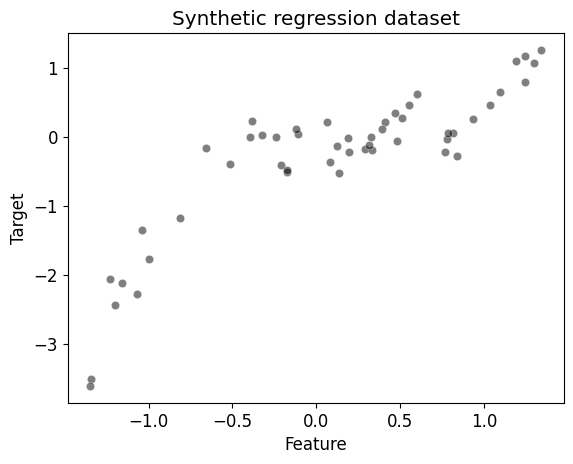

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
_ = plt.title("Synthetic regression dataset")

We will start by creating a decision tree regressor. We will set
the depth of the tree so that the resulting learner will underfit the data.

In [110]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(data_train, target_train)

target_train_predicted = tree.predict(data_train)
target_test_predicted = tree.predict(data_test)

Using the term "test" here refers to data that was not used for training.
It should not be confused with data coming from a train-test split, as it
was generated in equally-spaced intervals for the visual evaluation of the
predictions.

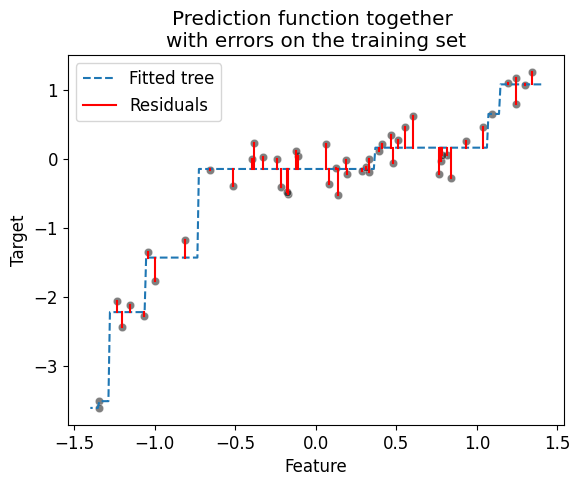

In [111]:
# plot the data
sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
# plot the predictions
line_predictions = plt.plot(data_test["Feature"], target_test_predicted, "--")

# plot the residuals
for value, true, predicted in zip(data_train["Feature"],
                                  target_train,
                                  target_train_predicted):
    lines_residuals = plt.plot([value, value], [true, predicted], color="red")

plt.legend([line_predictions[0], lines_residuals[0]],
           ["Fitted tree", "Residuals"])
_ = plt.title("Prediction function together \nwith errors on the training set")

Our initial tree was not expressive enough to handle the complexity
of the data. 

### Gradient-boosting decision tree (GBDT)

GBDT will fit a decision tree on the residuals error (hence the name "gradient") of the previous tree.
Therefore, each new tree in the ensemble predicts the error made by the previous learner instead of predicting the target directly.

In a gradient-boosting algorithm, the idea is to create a second tree which, given the same data `data`, will try
to predict the residuals instead of the vector `target`. We would therefore have a tree that is able to predict the errors made by the initial tree.

Let's train such a tree.

In [112]:
residuals = target_train - target_train_predicted

tree_residuals = DecisionTreeRegressor(max_depth=5, random_state=0)
tree_residuals.fit(data_train, residuals)

target_train_predicted_residuals = tree_residuals.predict(data_train)
target_test_predicted_residuals = tree_residuals.predict(data_test)

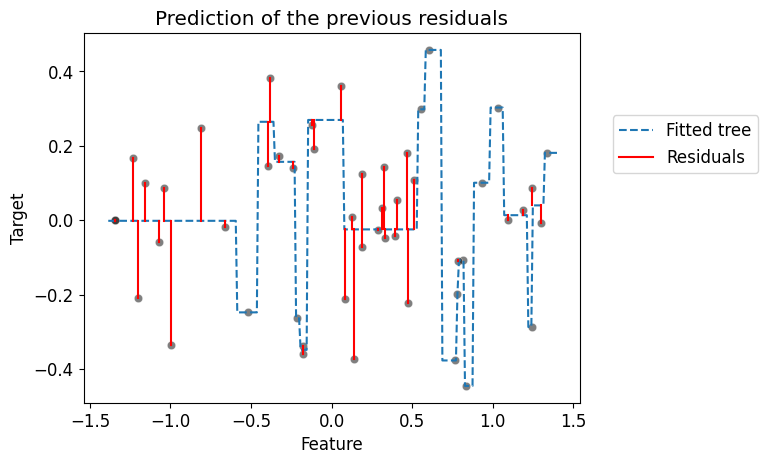

In [113]:
sns.scatterplot(x=data_train["Feature"], y=residuals, color="black", alpha=0.5)
line_predictions = plt.plot(
    data_test["Feature"], target_test_predicted_residuals, "--")

# plot the residuals of the predicted residuals
for value, true, predicted in zip(data_train["Feature"],
                                  residuals,
                                  target_train_predicted_residuals):
    lines_residuals = plt.plot([value, value], [true, predicted], color="red")

plt.legend([line_predictions[0], lines_residuals[0]],
           ["Fitted tree", "Residuals"], bbox_to_anchor=(1.05, 0.8),
           loc="upper left")
_ = plt.title("Prediction of the previous residuals")

We see that this new tree only manages to fit some of the residuals. 
* We will focus on a specific sample from the training set (i.e. we know that the sample will be well predicted using two successive trees). 

Let's first select this sample in `data_train`.

In [114]:
sample = data_train.iloc[[-2]]
x_sample = sample['Feature'].iloc[0]
target_true = target_train.iloc[-2]
target_true_residual = residuals.iloc[-2]

Let's plot the previous information and highlight our sample of interest.
Let's start by plotting the original data and the prediction of the first
decision tree.

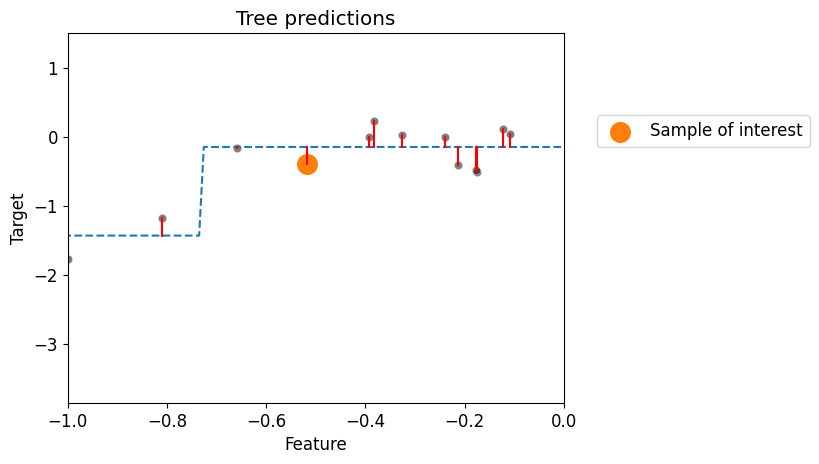

In [115]:
# Plot the previous information:
#   * the dataset
#   * the predictions
#   * the residuals

sns.scatterplot(x=data_train["Feature"], y=target_train, color="black",
                alpha=0.5)
plt.plot(data_test["Feature"], target_test_predicted, "--")
for value, true, predicted in zip(data_train["Feature"],
                                  target_train,
                                  target_train_predicted):
    lines_residuals = plt.plot([value, value], [true, predicted], color="red")

# Highlight the sample of interest
plt.scatter(sample, target_true, label="Sample of interest",
            color="tab:orange", s=200)
plt.xlim([-1, 0])
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Tree predictions")

Now, let's plot the residuals information. We will plot the residuals
computed from the first decision tree and show the residual predictions.

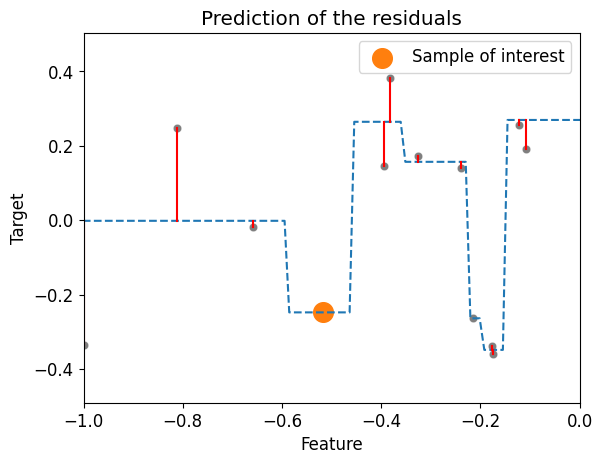

In [116]:
# Plot the previous information:
#   * the residuals committed by the first tree
#   * the residual predictions
#   * the residuals of the residual predictions

sns.scatterplot(x=data_train["Feature"], y=residuals,
                color="black", alpha=0.5)
plt.plot(data_test["Feature"], target_test_predicted_residuals, "--")
for value, true, predicted in zip(data_train["Feature"],
                                  residuals,
                                  target_train_predicted_residuals):
    lines_residuals = plt.plot([value, value], [true, predicted], color="red")

# Highlight the sample of interest
plt.scatter(sample, target_true_residual, label="Sample of interest",
            color="tab:orange", s=200)
plt.xlim([-1, 0])
plt.legend()
_ = plt.title("Prediction of the residuals")

For our sample of interest, our initial tree is making an error (small residual). 

When fitting the second tree, the residual in this case is
perfectly fitted and predicted. 

In [117]:
print(f"True value to predict for "
      f"f(x={x_sample:.3f}) = {target_true:.3f}")

y_pred_first_tree = tree.predict(sample)[0]
print(f"Prediction of the first decision tree for x={x_sample:.3f}: "
      f"y={y_pred_first_tree:.3f}")
print(f"Error of the tree: {target_true - y_pred_first_tree:.3f}")

True value to predict for f(x=-0.517) = -0.393
Prediction of the first decision tree for x=-0.517: y=-0.145
Error of the tree: -0.248


As we visually observed, we have a small error. Now, we can use the second
tree to try to predict this residual.

In [118]:
print(f"Prediction of the residual for x={x_sample:.3f}: "
      f"{tree_residuals.predict(sample)[0]:.3f}")

Prediction of the residual for x=-0.517: -0.248


We see that our second tree is capable of predicting the exact residual
(error) of our first tree. Therefore, we can predict the value of `x` by
summing the prediction of all the trees in the ensemble.

In [119]:
y_pred_first_and_second_tree = (
    y_pred_first_tree + tree_residuals.predict(sample)[0]
)
print(f"Prediction of the first and second decision trees combined for "
      f"x={x_sample:.3f}: y={y_pred_first_and_second_tree:.3f}")
print(f"Error of the tree: {target_true - y_pred_first_and_second_tree:.3f}")

Prediction of the first and second decision trees combined for x=-0.517: y=-0.393
Error of the tree: 0.000


We chose a sample for which only two trees were enough to make the perfect
prediction. 
* One needs to add several trees to the ensemble to successfully correct the error (i.e. the second tree corrects the first tree's error, while the third tree corrects the second tree's error and so on).

#### Example: Gradient-Boosted Random Forest Regression

We will compare the generalization performance of random-forest and gradient boosting on the California housing dataset.

##### Step 1: Loads the Data

In [120]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_validate

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

##### Step 2: Builds the Model

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=200)
cv_results_gbdt = cross_validate(
    gradient_boosting, data, target, scoring="neg_mean_absolute_error",
    n_jobs=10,
)

##### Step 3: Views the Results

In [122]:
print("Gradient Boosting Decision Tree")
print(f"Mean absolute error via cross-validation: "
      f"{-cv_results_gbdt['test_score'].mean():.3f} ± "
      f"{cv_results_gbdt['test_score'].std():.3f} k$")
print(f"Average fit time: "
      f"{cv_results_gbdt['fit_time'].mean():.3f} seconds")
print(f"Average score time: "
      f"{cv_results_gbdt['score_time'].mean():.3f} seconds")

Gradient Boosting Decision Tree
Mean absolute error via cross-validation: 46.410 ± 2.911 k$
Average fit time: 15.044 seconds
Average score time: 0.008 seconds


##### Step 4: Compairison to Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=200, n_jobs=2)
cv_results_rf = cross_validate(
    random_forest, data, target, scoring="neg_mean_absolute_error",
    n_jobs=2,
)

In [124]:
print("Random Forest")
print(f"Mean absolute error via cross-validation: "
      f"{-cv_results_rf['test_score'].mean():.3f} ± "
      f"{cv_results_rf['test_score'].std():.3f} k$")
print(f"Average fit time: "
      f"{cv_results_rf['fit_time'].mean():.3f} seconds")
print(f"Average score time: "
      f"{cv_results_rf['score_time'].mean():.3f} seconds")

Random Forest
Mean absolute error via cross-validation: 46.687 ± 4.700 k$
Average fit time: 33.924 seconds
Average score time: 0.079 seconds


In term of computation performance, the forest can be parallelized and will
benefit from using multiple cores of the CPU. In terms of scoring
performance, both algorithms lead to very close results.

However, we see that the gradient boosting is a very fast algorithm to
predict compared to random forest. This is due to the fact that gradient
boosting uses shallow trees. 

### Model Selection and Parameter Optimization

Looking at this new jersey diner menu of machine learning options with hyperparameters you might be wondering how do you select the best model

* Generally speaking the computational cost of training is minimal, you can just use brute force


Let's go back to the digits dataset

In [125]:
from sklearn import datasets, svm

# Loads the digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# instantiates and fits the support vector machine
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

**To get a better sense you can run multiple trials splitting the data into different _folds_ for testing**


In [126]:
import numpy as np

X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)  

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


All the results are close, but they are slightly different.

**Sklearn has tools that automate cross-validation methods**


In [127]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [128]:
for train, test in k_fold.split(X_digits):  
    print(svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]))

0.9638888888888889
0.9222222222222223


0.9637883008356546
0.9637883008356546
0.9303621169916435


**The cross-validation score can be directly calculated using the `cross_val_score helper`**
  - Given an estimator, the `cross-validation` object and the input dataset, the `cross_val_score` splits the data repeatedly into a training and a testing set, trains the estimator using the training set and computes the scores based on the testing set for each iteration of cross-validation.

**_n.b._** - `n_jobs=-1` allows for parallel processing


In [129]:
scores = cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro', n_jobs = -1)

In [130]:
 print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.04)


**There are a ton of different methods to do cross-validation**


In [131]:
IFrame('https://scikit-learn.org/stable/modules/cross_validation.html', width=1000, height=800)

**These can be passed as iterators into the cross-validation scoring estimator**


In [132]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
 
clf = svm.SVC(kernel='linear', C=1)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X_digits, y_digits, cv=cv)  

array([0.97407407, 0.97407407, 0.98703704, 0.97777778, 0.97222222])

**Cross validation metrics can be combined with GridSearch**


In [133]:
from sklearn.model_selection import GridSearchCV, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

Cs = np.logspace(-6, -1, 100)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1, cv=cv)
clf.fit(X_digits[:1000], y_digits[:1000])        

print(f'best score: {clf.best_score_ }')                                 

print(f'best estimator: {clf.best_estimator_.C}')                                                            

print('Prediction performance on test set is not as good as on train set')
print(f'{clf.score(X_digits[1000:], y_digits[1000:])}')

best score: 0.986
best estimator: 0.0019179102616724887
Prediction performance on test set is not as good as on train set
0.9473023839397742
